In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # Develop a data collection plan to gather information from various sources related to sustainability, eco-friendly choices, and grocery shopping trends. Include a strategy to ensure the data collected is relevant to AutoBasket’s objectives.
 # ●  Divide the group into smaller teams and assign each specific data sources to analyze. Use data analytics and visualization tools to process the collected data and identify market trends related to sustainable and eco-friendly recipes in grocery shopping and cooking. Discuss each finding with the whole group.
 # ●  Use visualizations and charts to provide valuable insights to AutoBasket.

In [3]:
grocery_df = pd.read_csv('/content/drive/MyDrive/krishna/WIL/Task 6/Groceries_dataset.csv')
grocery_df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/15,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/15,other vegetables
4,3037,1/2/15,whole milk


In [4]:
filt_grocery = pd.read_csv('/content/drive/MyDrive/krishna/WIL/Task 6/filtered groceries.csv')
filt_grocery.head()

,Fruits
0,whole milk
1,beef
2,chicken
3,fruit/vegetable juice
4,packaged fruit/vegetables


In [6]:
filt_grocery

,Fruits
0,whole milk
1,beef
2,chicken
3,fruit/vegetable juice
4,packaged fruit/vegetables
5,sausage
6,brown bread
7,pork
8,coffee
9,flour


In [5]:
filt_groc_df = grocery_df[grocery_df['itemDescription'].isin(filt_grocery['Fruits'])]
filt_groc_df.head()

,Member_number,Date,itemDescription
1,2552,5/1/15,whole milk
4,3037,1/2/15,whole milk
8,2762,20-03-2015,whole milk
11,2193,14-04-2015,beef
13,4546,3/9/15,chicken


In [7]:
filt_groc_df.shape

(7063, 3)

In [8]:
filt_groc_df['Date'] = pd.to_datetime(filt_groc_df['Date'], errors='coerce')
filt_groc_df.head()

<ipython-input-8-deae7376390c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filt_groc_df['Date'] = pd.to_datetime(filt_groc_df['Date'], errors='coerce')
<ipython-input-8-deae7376390c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_groc_df['Date'] = pd.to_datetime(filt_groc_df['Date'], errors='coerce')


,Member_number,Date,itemDescription
1,2552,2015-05-01,whole milk
4,3037,2015-01-02,whole milk
8,2762,2015-03-20,whole milk
11,2193,2015-04-14,beef
13,4546,2015-03-09,chicken


In [9]:
filt_groc_df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:

item_counts = filt_groc_df['itemDescription'].value_counts()
item_counts

whole milk                   2502
sausage                       924
brown bread                   571
pork                          566
fruit/vegetable juice         518
beef                          516
coffee                        476
chicken                       422
sugar                         265
flour                         146
packaged fruit/vegetables     128
fish                           29
Name: itemDescription, dtype: int64

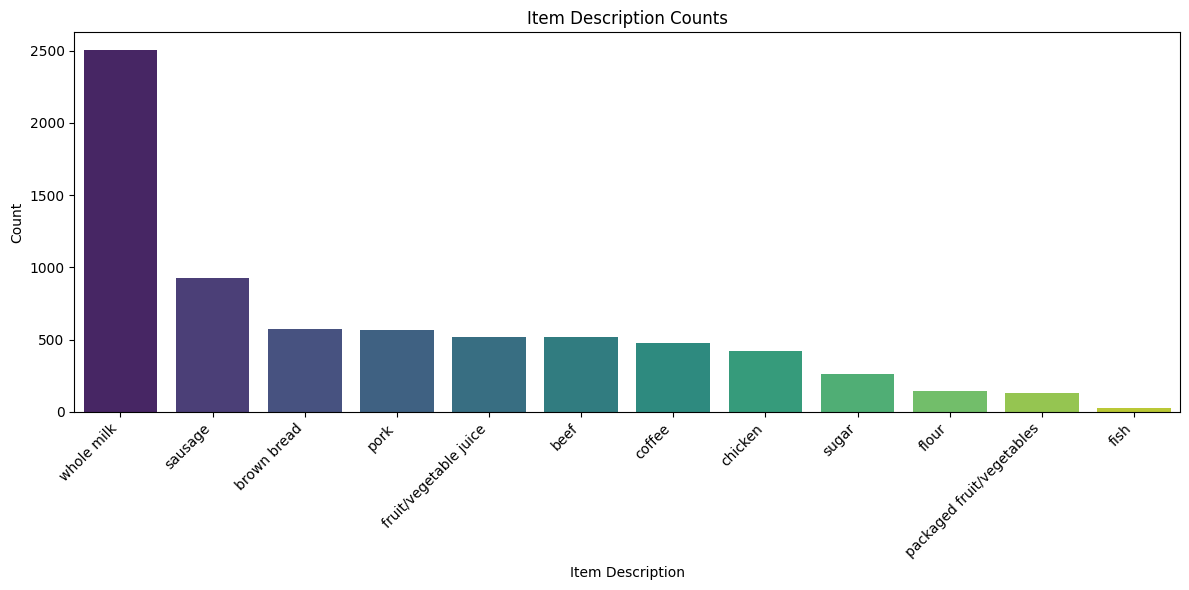

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette="viridis")
plt.xlabel('Item Description')
plt.ylabel('Count')
plt.title('Item Description Counts')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [12]:
filt_groc_df.head()

,Member_number,Date,itemDescription
1,2552,2015-05-01,whole milk
4,3037,2015-01-02,whole milk
8,2762,2015-03-20,whole milk
11,2193,2015-04-14,beef
13,4546,2015-03-09,chicken


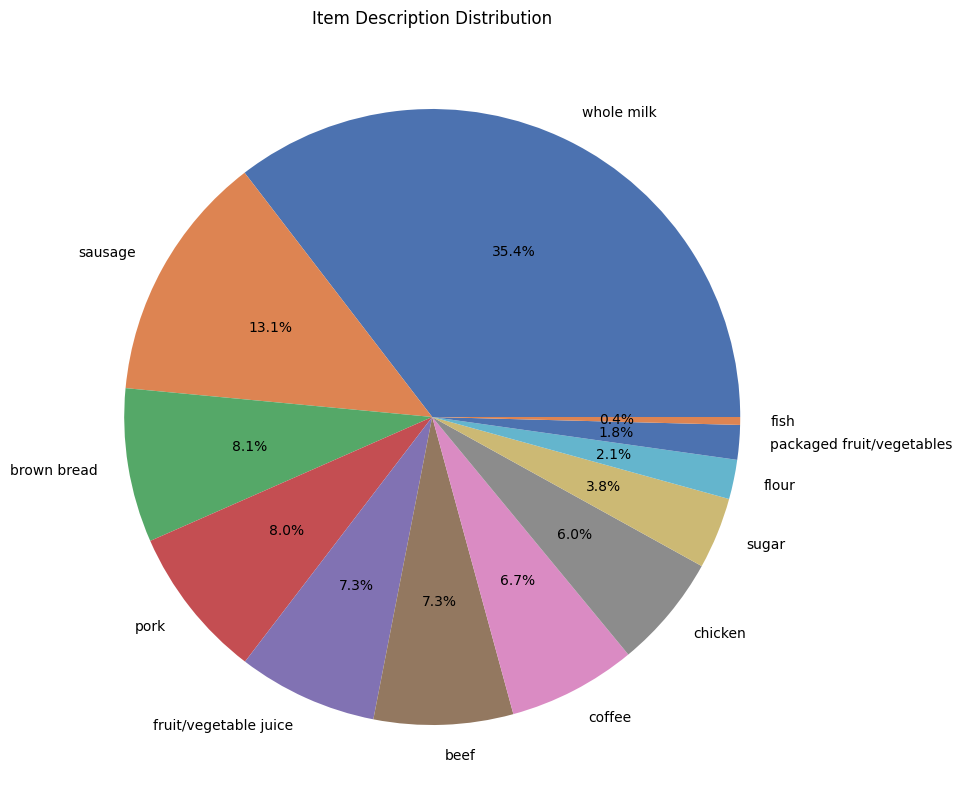

In [13]:
item_distribution = filt_groc_df['itemDescription'].value_counts()

colors = sns.color_palette("deep", len(item_distribution))

plt.figure(figsize=(12, 10))
plt.pie(item_distribution, labels=item_distribution.index, autopct='%1.1f%%', colors=colors)
plt.title('Item Description Distribution')
plt.show()

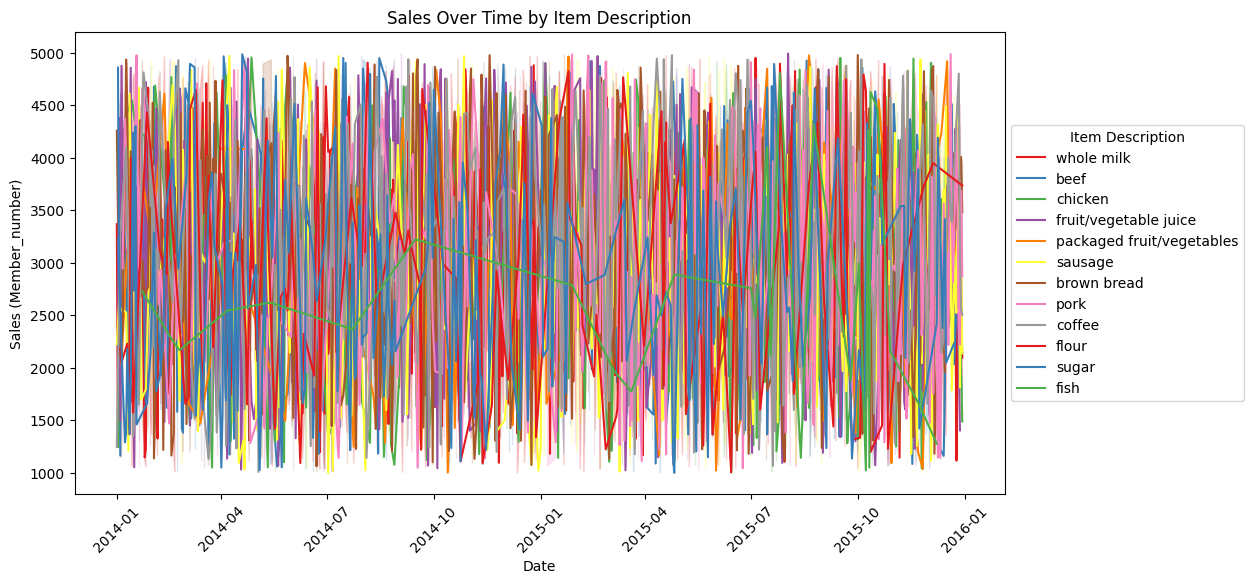

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filt_groc_df, x='Date', y='Member_number', hue='itemDescription', palette='Set1')
plt.xlabel('Date')
plt.ylabel('Sales (Member_number)')
plt.title('Sales Over Time by Item Description')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Item Description')
plt.show()

# Cooking Dataset

In [15]:
train_df = pd.read_json('/content/drive/MyDrive/krishna/WIL/Task 6/train.json')
test_df = pd.read_json('/content/drive/MyDrive/krishna/WIL/Task 6/test.json')

In [17]:
cook_df = pd.concat([train_df, test_df], ignore_index=True)
cook_df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [18]:
cook_df.shape

(49718, 3)

In [19]:
cook_df.isnull().sum()

id                0
cuisine        9944
ingredients       0
dtype: int64

In [20]:
cook_df = cook_df.dropna(axis=0, how='any')
cook_df.shape

(39774, 3)

In [21]:
cook_df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [22]:
# bar plot for count of entries for each cuisine
x = cook_df['cuisine'].value_counts().index
y = cook_df['cuisine'].value_counts().values

ent_df = pd.DataFrame({
    'Cuisine':x,
    'These many entries':y
})
#fig = sns.countplot(recipe['cuisine'])
fig = px.bar(ent_df,
             x='Cuisine',
             y='These many entries',
             color='Cuisine')
fig.update_layout(
    title="Count of Entries for Each Cuisine",
    title_x=0.5,  # Center the title horizontally
    title_y=0.95  # Adjust the vertical position as needed
)
fig.show()

<Figure size 1200x600 with 0 Axes>

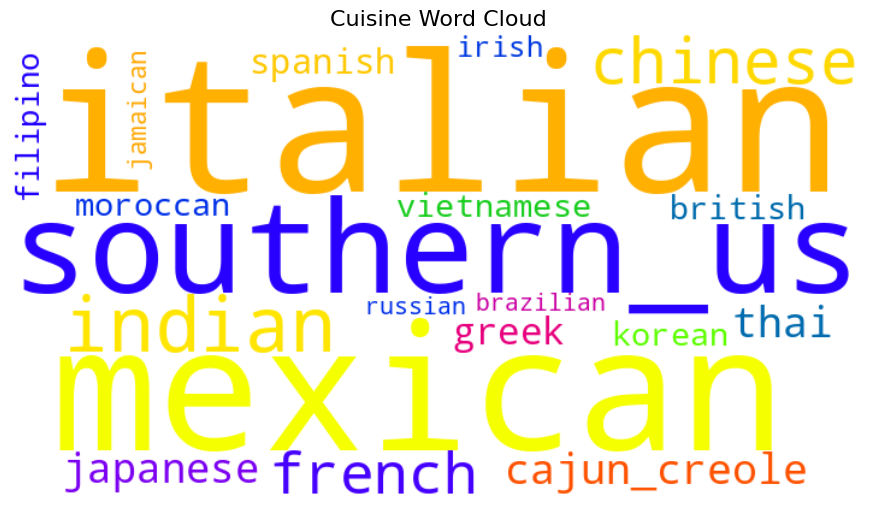

In [23]:
x= cook_df['cuisine'].values
plt.figure(figsize=(12, 6))

wordcloud = WordCloud(
    background_color='white',
    width=712,
    height=384,
    colormap='prism'
).generate(' '.join(x))

# Create a Seaborn color palette
seaborn_palette = sns.color_palette("Set1")

# Create a figure and axis for the word cloud
plt.figure(figsize=(12, 6))

# Use Seaborn's set_palette to set the color palette
sns.set_palette(seaborn_palette)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Cuisine Word Cloud', fontsize=16)
plt.show()


In [24]:
all_ingredients = [] # list to store all ingredients
for indiv_ingredient_list in cook_df['ingredients'].values:
    for ingredient in indiv_ingredient_list:
        all_ingredients.append(ingredient)

In [25]:
ingredients_together = pd.DataFrame(all_ingredients)
ingredients_together

,0
0,romaine lettuce
1,black olives
2,grape tomatoes
3,garlic
4,pepper
...,...
428270,garlic
428271,white sugar
428272,roma tomatoes
428273,celery


In [26]:
x = ingredients_together.value_counts()[0:30].index.tolist()
y = ingredients_together.value_counts()[0:30].values

df = pd.DataFrame({
    'Ingredient':x,
    'These many entries':y
})
#fig = sns.countplot(recipe['cuisine'])
fig = px.pie(df,
             names='Ingredient',
             values='These many entries',
             color='Ingredient')
fig.update_layout(title="Top 30 Ingredients", title_x=0.5, title_y=0.95)
fig.show()


#Filtering the recipes which contains atleast one ingredient from the grocery dataframe

In [27]:
unique_ingredients = filt_groc_df['itemDescription'].unique()
unique_ingredients

array(['whole milk', 'beef', 'chicken', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'sausage', 'brown bread', 'pork',
       'coffee', 'flour', 'sugar', 'fish'], dtype=object)

In [95]:
result_df = cook_df[cook_df['ingredients'].apply(lambda x: any(ingredient in x for ingredient in unique_ingredients))]
result_df.head()

,id,cuisine,ingredients
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
11,45887,chinese,"[low sodium soy sauce, fresh ginger, dry musta..."
18,2941,thai,"[sugar, hot chili, asian fish sauce, lime juice]"


In [96]:
result_df = result_df.reset_index(drop=True)
result_df.head()

,id,cuisine,ingredients
0,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
1,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
2,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
3,45887,chinese,"[low sodium soy sauce, fresh ginger, dry musta..."
4,2941,thai,"[sugar, hot chili, asian fish sauce, lime juice]"


In [97]:
result_df.shape

(9207, 3)

In [98]:
# bar plot for count of entries for each cuisine
x = result_df['cuisine'].value_counts().index
y = result_df['cuisine'].value_counts().values

ent_df = pd.DataFrame({
    'Cuisine':x,
    'These many entries':y
})
#fig = sns.countplot(recipe['cuisine'])
fig = px.bar(ent_df,
             x='Cuisine',
             y='These many entries',
             color='Cuisine')
fig.update_layout(
    title="Count of Entries for Each Cuisine for Collaborated Dataframe",
    title_x=0.5,  # Center the title horizontally
    title_y=0.95  # Adjust the vertical position as needed
)
fig.show()

<Figure size 1200x600 with 0 Axes>

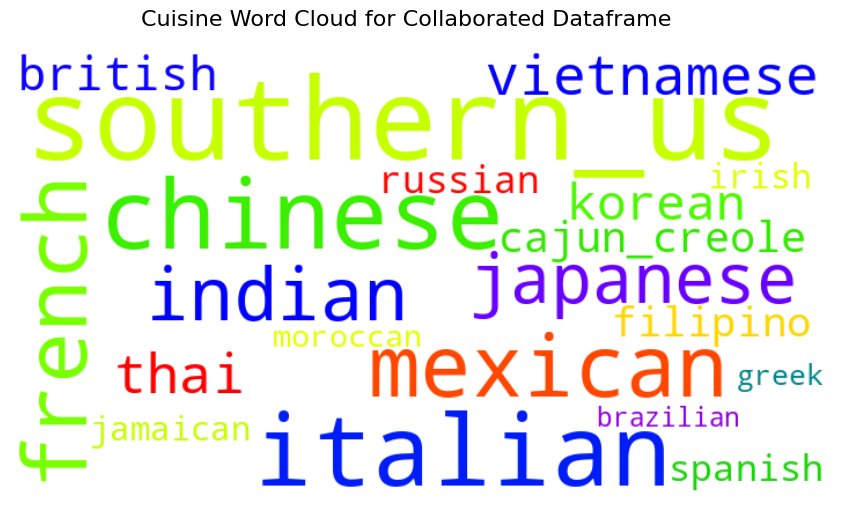

In [99]:
x= result_df['cuisine'].values
plt.figure(figsize=(12, 6))

wordcloud = WordCloud(
    background_color='white',
    width=712,
    height=384,
    colormap='prism'
).generate(' '.join(x))

# Create a Seaborn color palette
seaborn_palette = sns.color_palette("Set3")

# Create a figure and axis for the word cloud
plt.figure(figsize=(12, 6))

# Use Seaborn's set_palette to set the color palette
sns.set_palette(seaborn_palette)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.suptitle('Cuisine Word Cloud for Collaborated Dataframe', y=0.92, fontsize=16)

# Adjust the space between the title and the chart
plt.subplots_adjust(top=0.85)

plt.show()


In [100]:
all_ingredients = [] # list to store all ingredients
for indiv_ingredient_list in result_df['ingredients'].values:
    for ingredient in indiv_ingredient_list:
        all_ingredients.append(ingredient)

In [101]:
ingredients_together = pd.DataFrame(all_ingredients)
ingredients_together

,0
0,plain flour
1,sugar
2,butter
3,eggs
4,fresh ginger root
...,...
105208,sugar
105209,store bought low sodium chicken stock
105210,baking soda
105211,Shaoxing wine


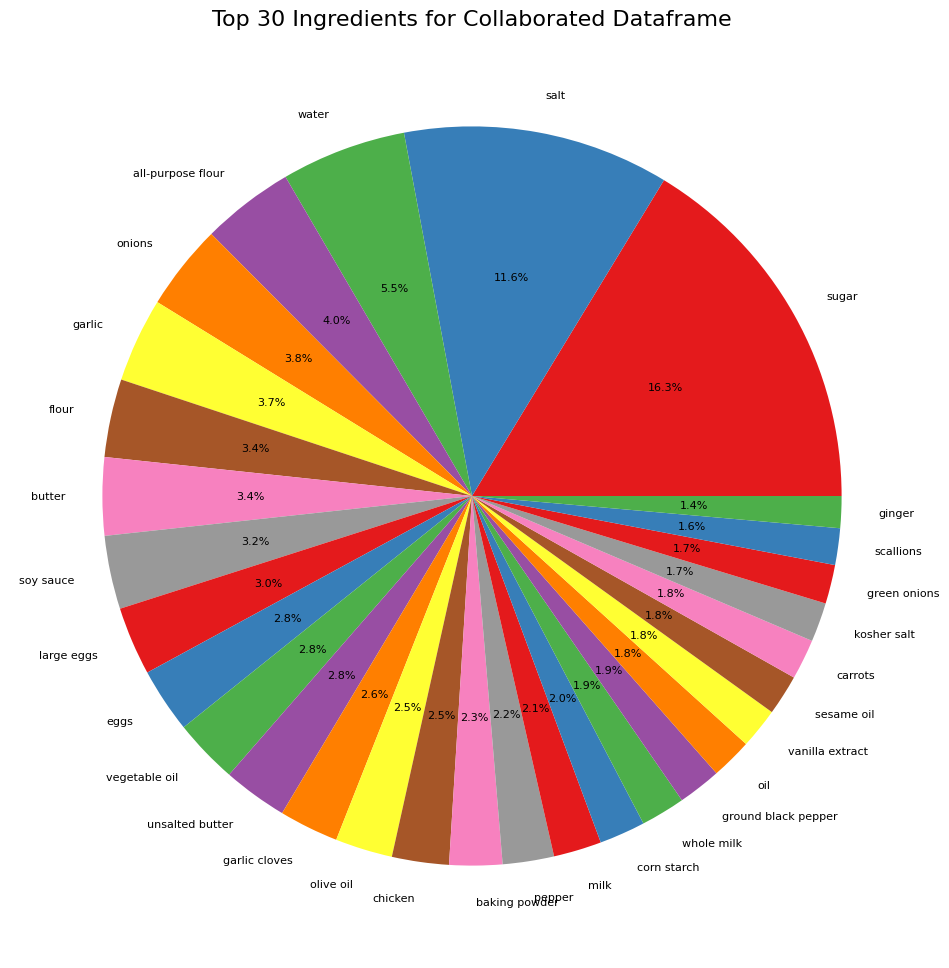

In [105]:
x = ingredients_together.value_counts()[0:30].index.tolist()
y = ingredients_together.value_counts()[0:30].values

df = pd.DataFrame({
    'Ingredient': x,
    'These many entries': y
})

x = [label[0] for label in x]
# Create a pie chart using Matplotlib
plt.figure(figsize=(16, 12))
plt.pie(df['These many entries'], labels=x, autopct='%1.1f%%', textprops={'fontsize': 8})

# Add a title
plt.title("Top 30 Ingredients for Collaborated Dataframe", fontsize=16)

# Style the chart with Seaborn
sns.set_palette('Set1')  # Choose a Seaborn color palette

# Show the chart
plt.show()

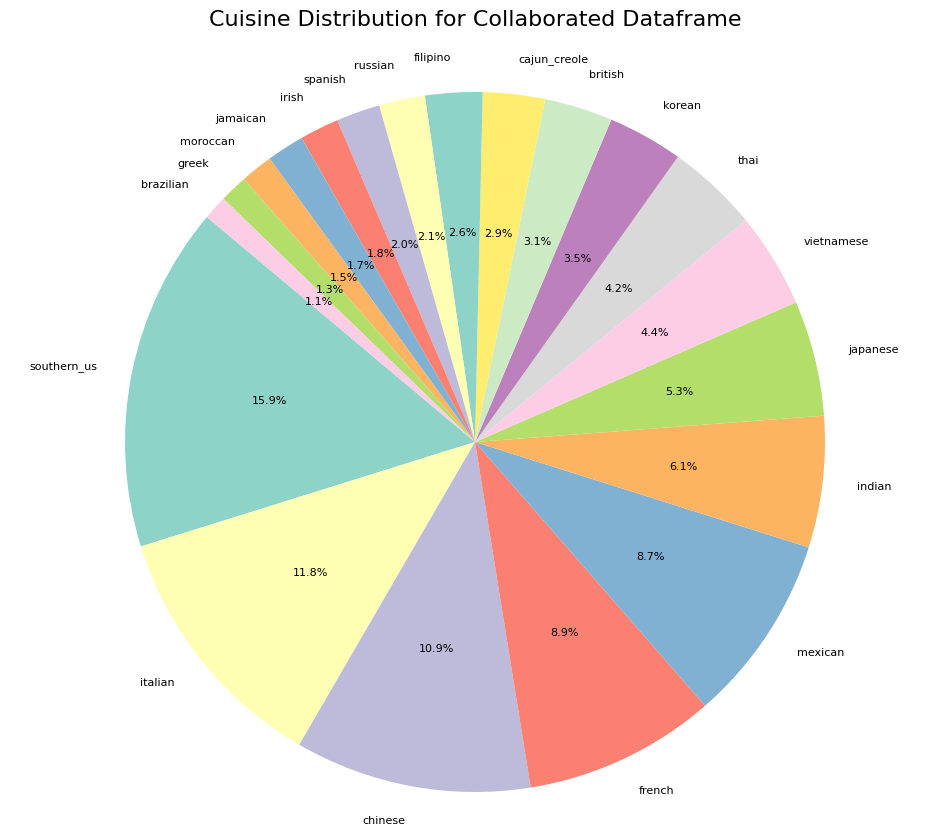

In [103]:
plt.figure(figsize=(12, 10))

# Count the number of occurrences of each cuisine
cuisine_counts = result_df['cuisine'].value_counts()

# Create a pie chart
sns.set_palette("Set3")  # Choose a color palette

plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})

# Add a title
plt.title('Cuisine Distribution for Collaborated Dataframe', y=1.03, fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

In [83]:
filt_groc_df['Date'].value_counts()

2015-01-25    25
2015-01-04    24
2015-03-20    22
2015-05-16    22
2015-05-17    22
              ..
2014-09-18     2
2014-04-01     2
2015-01-09     1
2015-02-19     1
2014-04-07     1
Name: Date, Length: 727, dtype: int64

In [107]:
result_df.head()

,id,cuisine,ingredients
0,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
1,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
2,16903,mexican,"[olive oil, purple onion, fresh pineapple, por..."
3,45887,chinese,"[low sodium soy sauce, fresh ginger, dry musta..."
4,2941,thai,"[sugar, hot chili, asian fish sauce, lime juice]"


In [82]:
filt_groc_df.head()

,Member_number,Date,itemDescription
1,2552,2015-05-01,whole milk
4,3037,2015-01-02,whole milk
8,2762,2015-03-20,whole milk
11,2193,2015-04-14,beef
13,4546,2015-03-09,chicken


In [108]:
item_description_occurrences = {}

# Loop through each item description in df1
for item_description in filt_groc_df['itemDescription']:
    # Initialize the occurrence count to 0
    occurrence_count = 0
    # Loop through the ingredients in df2 and count occurrences
    for ingredients in result_df['ingredients']:
        if item_description in ingredients:
            occurrence_count += 1
    # Store the occurrence count in the dictionary
    item_description_occurrences[item_description] = occurrence_count

# Create a DataFrame from the dictionary
occ_df = pd.DataFrame(list(item_description_occurrences.items()), columns=['itemDescription', 'Occurrences'])


In [109]:
occ_df.head()

,itemDescription,Occurrences
0,whole milk,764
1,beef,273
2,chicken,982
3,fruit/vegetable juice,0
4,packaged fruit/vegetables,0


In [110]:
occ_df.shape

(12, 2)

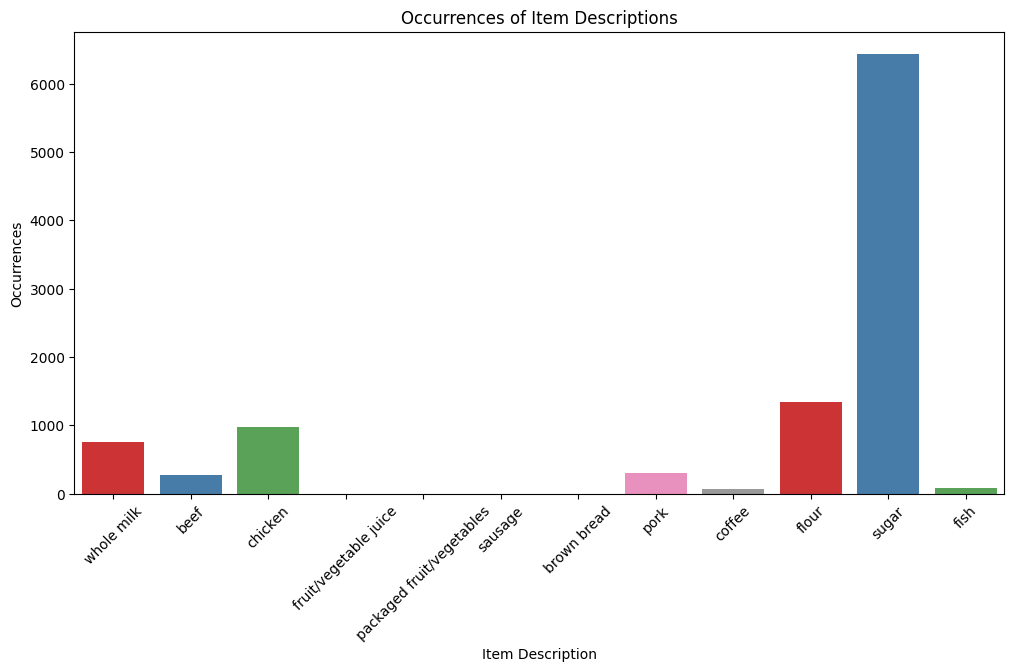

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(data=occ_df, x='itemDescription', y='Occurrences', palette='Set1')

# Add labels and a title
plt.xlabel('Item Description')
plt.ylabel('Occurrences')
plt.title('Occurrences of Item Descriptions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()